来源： [b站刘二大人--处理多维特征输入](https://www.bilibili.com/video/BV1Y7411d7Ys?p=7)
# Prepare Dataset

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
xy = np.loadtxt('../dataset/diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1])  # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
# print(x_data)
# print(y_data)

# Define Model

In [3]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
    
model = Model()
print(model)

Model(
  (linear1): Linear(in_features=8, out_features=6, bias=True)
  (linear2): Linear(in_features=6, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


# Construct Loss and Optimizer
## 注意在使用二元交叉熵计算损失的维度关系(计算之前还需要激活)，这里的y_pred和y_data维度都是(\[759, 1\])

In [5]:
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


# Training Cycle

100 0.6413201689720154
200 0.6322777271270752
300 0.5955487489700317
400 0.5296488404273987
500 0.4919593334197998
600 0.4763002395629883
700 0.46978849172592163
800 0.46675390005111694
900 0.46487873792648315
1000 0.4639298617839813
1100 0.46327805519104004
1200 0.46273529529571533
1300 0.4622042775154114
1400 0.4616772532463074
1500 0.461091011762619
1600 0.4603952169418335
1700 0.459516316652298
1800 0.4584980607032776
1900 0.45733630657196045
2000 0.4562112092971802


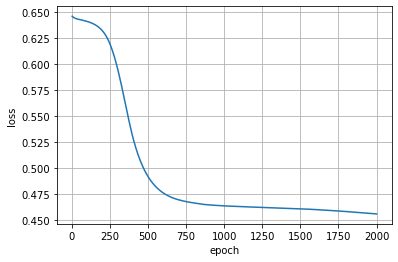

In [6]:
y_loss = [] 
max_epoch = 2001
for epoch in range(1, max_epoch):
    # forward
    y_pred = model(x_data)
    # 注意在使用二元交叉熵计算损失的维度关系(计算之前还需要激活)，这里的y_pred和y_data维度都是([759, 1])
    loss = criterion(y_pred, y_data)
    if epoch % 100 == 0:
        print(epoch, loss.item())
    y_loss.append(loss.item())
    # backward
    optimizer.zero_grad()
    loss.backward()
    # update
    optimizer.step()


# 展示epoch-loss变化图像
x_epoch = np.arange(1, max_epoch)
plt.plot(x_epoch, y_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()



In [7]:
print(y_data.shape)
print(y_pred.shape)


torch.Size([759, 1])
torch.Size([759, 1])
